<a href="https://colab.research.google.com/github/ctctmusic/Sentiment-Analysis-VAEDER_Musical-Instruments-Reviews/blob/main/Another_copy_of_Musical_Instrument_Review_Project_Corrected.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# #REFERENCE Project
# https://www.kaggle.com/code/madz2000/sentiment-analysis-89-accuracy/notebook

# #Dataset Source
# https://www.kaggle.com/datasets/eswarchandt/amazon-music-reviews?select=Musical_instruments_reviews.csv

In [ ]:
# !pip install vaderSentiment

1. Import libraries


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
#Loads the NLTK library into your Python script.
#nltk = Natural Language Toolkit
#for text processing and natural language proccessin
# from sklearn.feature_extraction.text import CountVectorizer
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
# from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
import re,string,unicodedata
# from nltk.tokenize.toktok import ToktokTokenizer
# from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
# from sklearn.model_selection import train_test_split
from string import punctuation
from nltk import pos_tag
from nltk.corpus import wordnet

2. Load Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
full_path = '/content/drive/MyDrive/Musical_instruments_reviews.csv'
# full_path = '/content/drive/MyDrive/AI_All Woman_Class Content/Project 2_Music_Instrument_Review/Musical_instruments_reviews.csv'
data = pd.read_csv(full_path, index_col=0)

3. Explore Data

In [ ]:
#check dataset info
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10261 entries, A2IBPI20UZIR0U to A2WA8TDCTGUADI
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   asin            10261 non-null  object 
 1   reviewerName    10234 non-null  object 
 2   helpful         10261 non-null  object 
 3   reviewText      10254 non-null  object 
 4   overall         10261 non-null  float64
 5   summary         10261 non-null  object 
 6   unixReviewTime  10261 non-null  int64  
 7   reviewTime      10261 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 721.5+ KB


In [ ]:
data.head()

,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
reviewerID,,,,,,,,
A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]","Not much to write about here, but it does exac...",5.0,good,1393545600,"02 28, 2014"
A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",The product does exactly as it should and is q...,5.0,Jake,1363392000,"03 16, 2013"
A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",The primary job of this device is to block the...,5.0,It Does The Job Well,1377648000,"08 28, 2013"
A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",Nice windscreen protects my MXL mic and preven...,5.0,GOOD WINDSCREEN FOR THE MONEY,1392336000,"02 14, 2014"
A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",This pop filter is great. It looks and perform...,5.0,No more pops when I record my vocals.,1392940800,"02 21, 2014"


In [ ]:
data.isna().sum()


,0
asin,0
reviewerName,27
helpful,0
reviewText,7
overall,0
summary,0
unixReviewTime,0
reviewTime,0


In [ ]:
data.reviewText.fillna("",inplace = True)
#fillna(""): Replaces all NaN (missing) values in the column reviewText with an empty string ("").
#This ensures that when you process text data, you won’t encounter errors due to NaN values.

<ipython-input-133-5a4f6e8099ee>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data.reviewText.fillna("",inplace = True)


In [ ]:
df = data.copy() # Create a copy of the original DataFrame
# Now, delete the columns from the copy - check if the column exists before deleting
if 'reviewerID' in df.columns:
    del df["reviewerID"]
if 'asin' in df.columns:
    del df['asin']
if 'reviewerName' in df.columns:
    del df['reviewerName']
if 'helpful' in df.columns:
    del df['helpful']
if 'unixReviewTime' in df.columns:
    del df['unixReviewTime']
if 'reviewTime' in df.columns:
    del df['reviewTime']

In [ ]:
# prompt: drop index

# Assuming 'df' is your DataFrame
df = df.reset_index(drop=True)


In [ ]:
df.head()

,reviewText,overall,summary
0,"Not much to write about here, but it does exac...",5.0,good
1,The product does exactly as it should and is q...,5.0,Jake
2,The primary job of this device is to block the...,5.0,It Does The Job Well
3,Nice windscreen protects my MXL mic and preven...,5.0,GOOD WINDSCREEN FOR THE MONEY
4,This pop filter is great. It looks and perform...,5.0,No more pops when I record my vocals.


In [ ]:
df.overall.value_counts()

,count
overall,
5.0,6938
4.0,2084
3.0,772
2.0,250
1.0,217


In [ ]:
def sentiment_rating(rating):
    # Replacing ratings of 1,2,3 with 0 (not good) and 4,5 with 1 (good)
    if(int(rating) == 1 or int(rating) == 2 or int(rating) == 3):
        return 0
    else:
        return 1
df.overall = df.overall.apply(sentiment_rating)

In [ ]:
df.overall.value_counts()

,count
overall,
1,9022
0,1239


Sentiment Analysis

In [ ]:
nltk.download("vader_lexicon")
#Downloads the sentiment word list VADER uses.

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
nltk.download("stopwords") #Downloads common English stopwords.

stop = set(stopwords.words('english')) #Creates a set of stopwords for fast lookup.
punctuation = list(string.punctuation) #Creates a list of punctuation characters.
stop.update(punctuation) #Adds punctuation to the stopwords set (to remove both in preprocessing).

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
#function is text preprocessing
#especially when you're doing lemmatization — the process of reducing words to their base form (e.g., "running" → "run").
#POS stands for Part Of Speech.
#In NLP, each word is assigned a POS tag like:
#'JJ' = adjective
#'VB' = verb
#'NN' = noun
#'RB' = adverb
#These tags help the lemmatizer understand how to lemmatize a word.

def get_simple_pos(tag):
    if tag.startswith('J'): #if the tag starts with 'J' (e.g., 'JJ' for adjective), it returns the ADJ constant from WordNet lemmatizer
        return wordnet.ADJ
    elif tag.startswith('V'): #'V' (e.g., 'VB', 'VBD', 'VBG') are verbs.
        return wordnet.VERB
    elif tag.startswith('N'): #'N' (e.g., 'NN', 'NNS') are nouns.
        return wordnet.NOUN
    elif tag.startswith('R'): #'R' (e.g., 'RB', 'RBR') are adverbs.
        return wordnet.ADV
    else:
        return wordnet.NOUN #If the tag doesn’t match any of the above, default to noun (safe fallback for lemmatization).

In [ ]:
!pip install vaderSentiment #Installs the vaderSentiment package so you can do sentiment analysis in Python.

In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer #Loads the VADER sentiment analyzer class.
analyser = SentimentIntensityAnalyzer() #Creates an analyzer object that can evaluate the sentiment of text.
analyser

In [ ]:
def sentiment_analyzer_scores(sentence): #Defines a function to analyze sentiment
    score = analyser.polarity_scores(sentence) #Gets sentiment scores using VADER
    return score['compound'] #Returns the overall sentiment score

In [ ]:
df['sentiment'] = df['reviewText'].apply(lambda x: sentiment_analyzer_scores(x))
#This saves the results (i.e., the compound sentiment scores) into a new column called 'sentiment'.

In [ ]:
df

,reviewText,overall,summary,sentiment
0,"Not much to write about here, but it does exac...",1,good,0.6903
1,The product does exactly as it should and is q...,1,Jake,0.9588
2,The primary job of this device is to block the...,1,It Does The Job Well,-0.7003
3,Nice windscreen protects my MXL mic and preven...,1,GOOD WINDSCREEN FOR THE MONEY,0.5859
4,This pop filter is great. It looks and perform...,1,No more pops when I record my vocals.,0.7650
...,...,...,...,...
10256,"Great, just as expected. Thank to all.",1,Five Stars,0.7650
10257,I've been thinking about trying the Nanoweb st...,1,"Long life, and for some players, a good econom...",0.9964
10258,I have tried coated strings in the past ( incl...,1,Good for coated.,0.8357
10259,"Well, MADE by Elixir and DEVELOPED with Taylor...",1,Taylor Made,0.9437


Let's analyse the positive reviews

In [ ]:
df.loc[df['sentiment'] >= 0.80,'reviewText']
#returns all entries from data where sentiment is 0.80 or higher
#positive reviews

,reviewText
1,The product does exactly as it should and is q...
5,So good that I bought another one. Love the h...
9,Monster makes the best cables and a lifetime w...
10,"Monster makes a wide array of cables, includin..."
13,"I love it, I used this for my Yamaha ypt-230 a..."
...,...
10255,I have lots of friends who play these strings....
10257,I've been thinking about trying the Nanoweb st...
10258,I have tried coated strings in the past ( incl...
10259,"Well, MADE by Elixir and DEVELOPED with Taylor..."


In [ ]:
positive = df.loc[df['sentiment'] >= 0.80]

Positive Sentiments


In [ ]:
nltk.download('punkt_tab')
nltk.download('stopwords')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
extra_stop_words = ['guitar', 'dont', 'work', 'like', 'get', 'string' ,
                    'problem', 'look','around', 'great', 'time', 'much',
                    'first', 'cheap',]

all_stop_words = list(stopwords.words('english')) + extra_stop_words

In [ ]:
def text_preprocessing(text, language):
    # 1 create tokens
    tokens = word_tokenize(text)
    # 2 lower case
    tokens = [w.lower() for w in tokens]
    # 3 remove punctuations
    stripped = [word for word in tokens if word.isalpha()]
    # 4 remove stop_words
    stop_words = list(set(stopwords.words(language)))
    stop_words = stop_words + extra_stop_words
    words = [w for w in stripped if not w in stop_words]

    return words

In [ ]:
positive['reviewText'].apply(lambda x: text_preprocessing(x, 'english'))

,reviewText
1,"[product, exactly, quite, realized, double, sc..."
5,"[good, bought, another, one, love, heavy, cord..."
9,"[monster, makes, best, cables, lifetime, warra..."
10,"[monster, makes, wide, array, cables, includin..."
13,"[love, used, yamaha, works, would, recommend, ..."
...,...
10255,"[lots, friends, play, strings, love, clearly, ..."
10257,"[thinking, trying, nanoweb, strings, bit, put,..."
10258,"[tried, coated, strings, past, including, elix..."
10259,"[well, made, elixir, developed, taylor, guitar..."


In [ ]:
positive['text_clean'] = positive['reviewText'].apply(lambda x: text_preprocessing(x, 'english'))


<ipython-input-118-1d4aeaedb8ea>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  positive['text_clean'] = positive['reviewText'].apply(lambda x: text_preprocessing(x, 'english'))


In [ ]:
positive[['reviewText', 'text_clean']].iloc[100].values
#positive[['reviewTest', 'text_clean']] -selects only the original and cleaned text columns
#iloc[] - picks the 45th row from these two columns
#.values - converts that row into a NumPy array

array(['well made and the perfect length for my needs. the shielding was great as well. the end connectors were well made and strong.',
       list(['well', 'made', 'perfect', 'length', 'needs', 'shielding', 'well', 'end', 'connectors', 'well', 'made', 'strong'])],
      dtype=object)

WordCloud


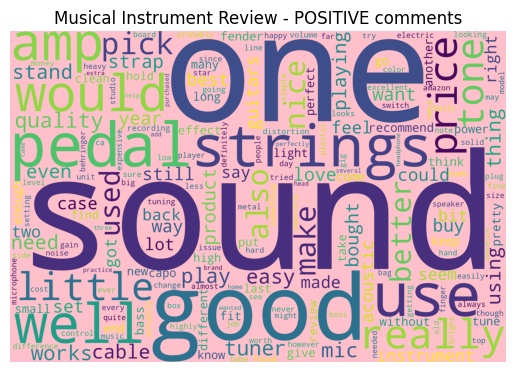

In [ ]:
from wordcloud import WordCloud
wordcloud = WordCloud(background_color="Pink",
                      width= 3000, height = 2000,collocations=False,
                      stopwords = stopwords.words('english'))

all_clean_text = ' '.join(positive['text_clean'].apply(lambda x: " ".join(x)))
wordcloud.generate(all_clean_text)

plt.imshow(wordcloud)
plt.axis("off")
plt.title('Musical Instrument Review - POSITIVE comments');

Negative Reviews


Negative Compound < 0.0

In [ ]:
df.loc[df['sentiment'] <= 0.0,'reviewText']

,reviewText
2,The primary job of this device is to block the...
6,"I have used monster cables for years, and with..."
14,I bought this to use in my home studio to cont...
25,Cant go wrong. Great quality on a budget price...
36,These are not the greatest but they're cheap a...
...,...
10173,I am a guitar player who bought a drum kit for...
10175,I seem to have problem with getting it to &#34...
10176,I love these clip-on tuners. I have several bu...
10178,The larger ones sometimes have the neck snap s...


In [ ]:
negative = df.loc[df['sentiment'] <= 0.0]

Text Cleaning


In [ ]:
negative['text_clean'] = negative['reviewText'].apply(lambda x: text_preprocessing(x, 'english'))

<ipython-input-123-4af90ff63098>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  negative['text_clean'] = negative['reviewText'].apply(lambda x: text_preprocessing(x, 'english'))


Word Cloud

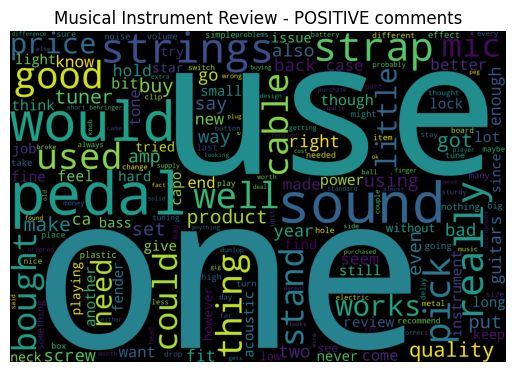

In [ ]:
from wordcloud import WordCloud
wordcloud = WordCloud(background_color="Black",
                      width= 3000, height = 2000,collocations=False,
                      stopwords = stopwords.words('english'))

all_clean_text_neg = ' '.join(negative['text_clean'].apply(lambda x: " ".join(x)))
wordcloud.generate(all_clean_text_neg)

plt.imshow(wordcloud)
plt.axis("off")
plt.title('Musical Instrument Review - POSITIVE comments');